# 다중회귀분석(Multivariate Regression)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# 실습용 데이터

- pandas DataFrame
  - Insurance.csv

In [3]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# I. 탐색적 데이터 분석

- 시각화 패키지

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

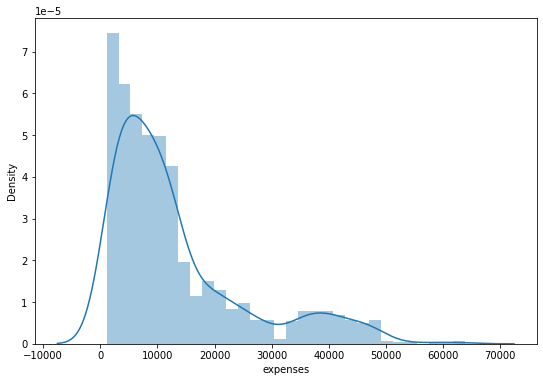

In [6]:
plt.figure(figsize = (9, 6))
sns.distplot(DF.expenses,
             hist = True, # 그래프 상 막대 모양
             kde = True)
plt.show()

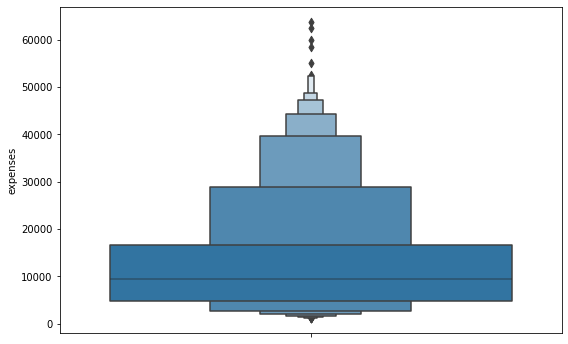

In [7]:
plt.figure(figsize = (9, 6))
sns.boxenplot(y = 'expenses', data = DF)
plt.show()

> ## 2) 성별 별 의료비 분포

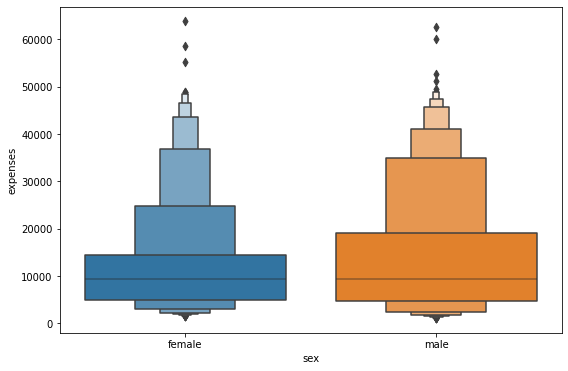

In [8]:
plt.figure(figsize = (9, 6))
sns.boxenplot(x = 'sex', y = 'expenses', data = DF)
plt.show()

In [9]:
DF.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

> ## 3) 자녀수 별 의료비 분포

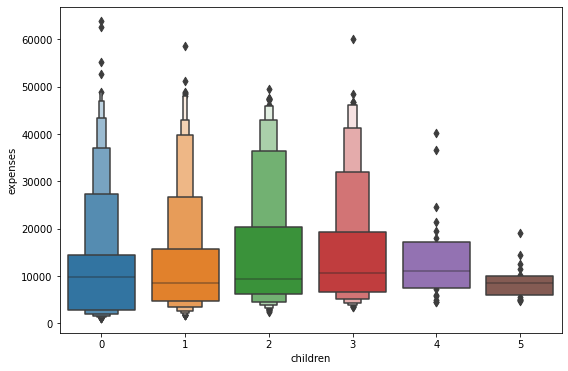

In [10]:
plt.figure(figsize = (9, 6))
sns.boxenplot(x = 'children',y = 'expenses', data = DF)
plt.show()

In [11]:
DF.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

> ## 4) 흡연여부 별 의료비 분포

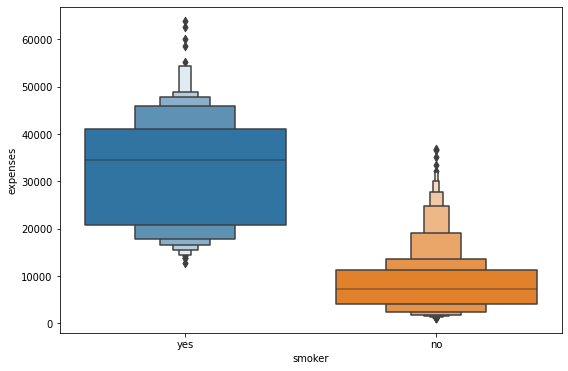

In [13]:
plt.figure(figsize = (9, 6))
sns.boxenplot(x = 'smoker',y = 'expenses', data = DF)
plt.show()

In [14]:
DF.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

> ## 5) 거주지역 별 의료비 분포

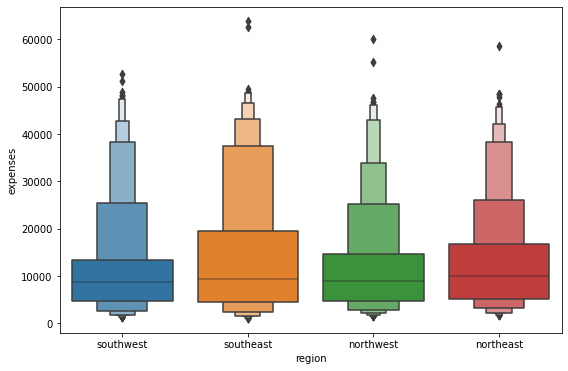

In [15]:
plt.figure(figsize = (9, 6))
sns.boxenplot(x = 'region',y = 'expenses', data = DF)
plt.show()

In [17]:
DF.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

> ## 6) BMI 분포 및 의료비와의 관계

- BMI 분포

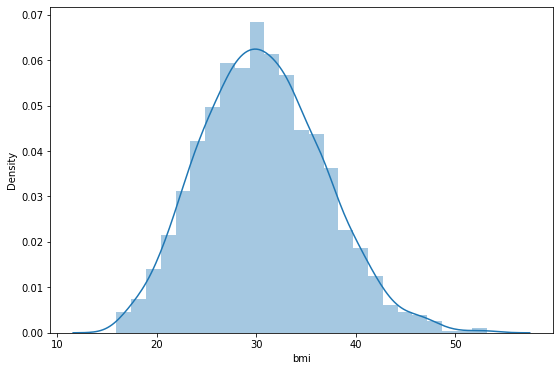

In [18]:
plt.figure(figsize = (9, 6))
sns.distplot(DF.bmi,
             hist = True,
             kde = True)
plt.show()

- BMI와 의료비 간의 관계

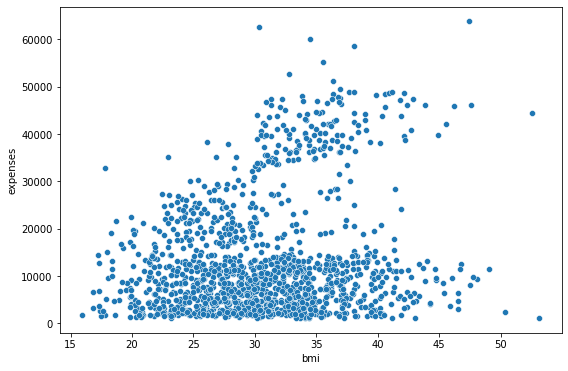

In [19]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = DF.bmi,y = DF.expenses, data = DF)
plt.show()

# II. Modeling - sklearn Package

> ## 1) Integer Encoding

- object to int64

In [20]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- LableEncoder()
  - 'sex', 'smoker', 'region' to int 64

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
DF['sex'] = encoder1.fit_transform(DF.sex)

In [22]:
encoder2 = LabelEncoder()
DF['smoker'] = encoder2.fit_transform(DF.smoker)

In [23]:
encoder3 = LabelEncoder()
DF['region'] = encoder3.fit_transform(DF.region)

- Encoding 결과 확인

In [24]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


- 변경된 값 확인

In [25]:
DF.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


> ## 2) Train & Test Array Split(7:3)

In [26]:
from sklearn.model_selection import train_test_split

X = DF[['age', 'sex']]
y = DF['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (936, 2) (936,)
Test Data :  (402, 2) (402,)


> ## 3) fit()

In [27]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> ## 4) .predict()

In [28]:
y_hat = RA.predict(X_test)

> ## 5) 오차(Error) 값 확인

- Mean Squared Error - sklearn

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse2 = mean_squared_error(y_test, y_hat)

np.sqrt(mse2)

10633.607635499553

# III. Modeling - statsmodels Package

> ## 1) Data Preprocessing

- Train & Test DataFrame Split(7:3)

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DF, test_size = 0.3, random_state = 2045)

train_set.shape, test_set.shape

((936, 7), (402, 7))

> ## 2) expenses ~ age + sex

- train_set으로 모델 생성
- OLS(최소자승법) : Ordinary Least Squares

In [33]:
import statsmodels.formula.api as smf

Model_1 = smf.ols(formula = 'expenses ~ age + sex', # X가 문자여도 상관 X
                  data = train_set).fit()

> ## 3) y_hat 생성

- test_set으로 y_hat(예측값) 계산

In [34]:
y_hat_1 = Model_1.predict(test_set[['age', 'sex']])

> ## 4) 오차(Error)값 확인

- Mean Squared Error - sklearn

In [35]:
mse1 = mean_squared_error(test_set.expenses, y_hat_1)

np.sqrt(mse1)

10633.607635499553

# IV. Package별 오차값 비교

In [36]:
print('statmodels : ', np.sqrt(mse1))
print('sklearn : ', np.sqrt(mse2))

statmodels :  10633.607635499553
sklearn :  10633.607635499553


## #
## #
## #
## The End
## #
## #
## #